<a href="https://colab.research.google.com/github/Abh0304/special-couscous/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


--2024-09-19 07:29:04--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.08s   

2024-09-19 07:29:04 (66.0 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [7]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])


In [ ]:
#sentences = ['I love my dog','I love my cat','You love my dog!','Do you think my dog is amazing?']
#tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>") # Out Of Vocabulary Token
#tokenizer.fit_on_texts(sentences)
#word_index = tokenizer.word_index
#padded = pad_sequences(sequences)
#print(word_index)
#print(padded)

The padded sequences contains zeros in it, it is done so to make it symmetrical. Consider an example of checking a polynomial of P^3 is linearly independent or not. Their can exists polynomials having all the degrees along with that there can exists polynomials without having all the degrees.

Since we have to check it's linear independency or dependency, we have to pad zeros to the coefficient matrix whose number of columns will be equal to the maximum power of 'P' at position where the power or degree is missing. Same process follows here.

In [12]:
# Now we have to split our data into training and testing
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
#sequences = tokenizer.texts_to_sequences(sentences)
#print(sequences)

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [ ]:
#test_data = ['I really love my dog','My dog loves my manatee']
#test_seq = tokenizer.texts_to_sequences(test_data)
#print(test_seq)

In [13]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
"""
tokenizer = Tokenizer(oov_token = "<OOV>")
tokenizer.fit_on_texts(sentence)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, padding = 'post')
print(word_index)
print(padded[0])
print(padded.shape)
"""

'\ntokenizer = Tokenizer(oov_token = "<OOV>")\ntokenizer.fit_on_texts(sentence)\nword_index = tokenizer.word_index\nsequences = tokenizer.texts_to_sequences(sentence)\npadded = pad_sequences(sequences, padding = \'post\')\nprint(word_index)\nprint(padded[0])\nprint(padded.shape)\n'

In [14]:
#Earlier the tokenizer knew every tokens in the sentence, since we want to train out neural network we have to change our tokenizer to contain only
#tokens of only training data set
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [15]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [16]:
#Training our neural network
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - 7ms/step - accuracy: 0.5702 - loss: 0.6780 - val_accuracy: 0.5634 - val_loss: 0.6506
Epoch 2/30
625/625 - 3s - 5ms/step - accuracy: 0.7565 - loss: 0.5222 - val_accuracy: 0.7879 - val_loss: 0.4533
Epoch 3/30
625/625 - 1s - 2ms/step - accuracy: 0.8278 - loss: 0.3943 - val_accuracy: 0.8343 - val_loss: 0.3909
Epoch 4/30
625/625 - 1s - 2ms/step - accuracy: 0.8500 - loss: 0.3478 - val_accuracy: 0.8210 - val_loss: 0.3904
Epoch 5/30
625/625 - 1s - 2ms/step - accuracy: 0.8717 - loss: 0.3067 - val_accuracy: 0.8231 - val_loss: 0.3846
Epoch 6/30
625/625 - 1s - 2ms/step - accuracy: 0.8826 - loss: 0.2765 - val_accuracy: 0.8138 - val_loss: 0.4045
Epoch 7/30
625/625 - 2s - 3ms/step - accuracy: 0.8901 - loss: 0.2606 - val_accuracy: 0.8532 - val_loss: 0.3464
Epoch 8/30
625/625 - 3s - 4ms/step - accuracy: 0.9057 - loss: 0.2383 - val_accuracy: 0.8577 - val_loss: 0.3427
Epoch 9/30
625/625 - 2s - 3ms/step - accuracy: 0.9095 - loss: 0.2259 - val_accuracy: 0.8530 - val_loss: 0.3487
E

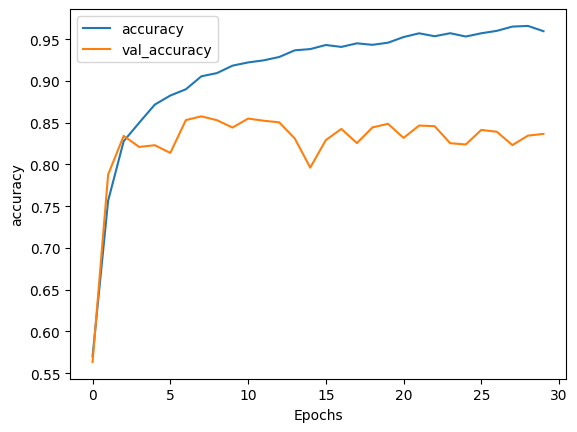

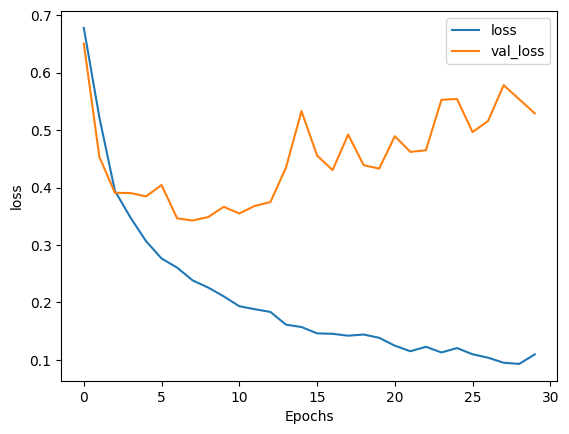

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [20]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
[[0.7972148 ]
 [0.01716335]]


In [26]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier()
]

In [28]:
# Create a dictionary to store the results
results = {}

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(training_padded, training_labels) # Changed X_train_scaled to training_padded
    y_pred = clf.predict(testing_padded)

    # Calculate accuracy
    accuracy = accuracy_score(testing_labels, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")

    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(testing_labels, y_pred))

    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(testing_labels, y_pred))
    print("="*50)

RandomForestClassifier Accuracy: 0.6676106722313311
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.66      0.83      0.74      3779
           1       0.68      0.46      0.55      2930

    accuracy                           0.67      6709
   macro avg       0.67      0.64      0.64      6709
weighted avg       0.67      0.67      0.65      6709

Confusion Matrix for RandomForestClassifier:
[[3129  650]
 [1580 1350]]
AdaBoostClassifier Accuracy: 0.6674616187211209
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      3779
           1       0.65      0.51      0.57      2930

    accuracy                           0.67      6709
   macro avg       0.66      0.65      0.65      6709
weighted avg       0.67      0.67      0.66      6709

Confusion Matrix for AdaBoostClassifier:
[[2979  800]
 [1431 1499]]
GradientBo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.5732598002682964
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.59      0.82      0.68      3779
           1       0.52      0.26      0.35      2930

    accuracy                           0.57      6709
   macro avg       0.56      0.54      0.52      6709
weighted avg       0.56      0.57      0.54      6709

Confusion Matrix for LogisticRegression:
[[3083  696]
 [2167  763]]


KeyboardInterrupt: 